<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\beall\AppData\Local\Temp\ipykernel_17684\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
print(f"Remaining duplicate rows: {df.duplicated().sum()}")


Remaining duplicate rows: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
missing_coding = df['CodingActivities'].isna().sum()
print(f"Missing values in 'CodingActivities': {missing_coding}")


Missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
df['CodingActivities'].fillna(method='ffill', inplace=True)


C:\Users\beall\AppData\Local\Temp\ipykernel_17684\3231349082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
C:\Users\beall\AppData\Local\Temp\ipykernel_17684\3231349082.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


In [9]:
missing_coding = df['CodingActivities'].isna().sum()
print(f"Missing values in 'CodingActivities': {missing_coding}")

Missing values in 'CodingActivities': 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
comp_columns = [col for col in df.columns if 'Comp' in col]
print(comp_columns)


['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Reshape and scale the data (excluding NaNs)
comp_values = df[['ConvertedCompYearly']].copy()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(comp_values)


In [12]:
comp_columns = [col for col in df.columns if 'Comp' in col]
print(comp_columns)

['CompTotal', 'AIComplex', 'ConvertedCompYearly', 'ConvertedCompYearly_MinMax']


In [ ]:
df['ConvertedCompYearly_MinMax'].describe()

count    23435.000000
mean         0.005300
std          0.011488
min          0.000000
25%          0.002012
50%          0.003998
75%          0.006642
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [ ]:
from scipy.stats import zscore

df['ConvertedCompYearly_ZScore'] = zscore(df['ConvertedCompYearly'], nan_policy='omit')

In [15]:
comp_columns = [col for col in df.columns if 'Comp' in col]
print(comp_columns)

['CompTotal', 'AIComplex', 'ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_ZScore']


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


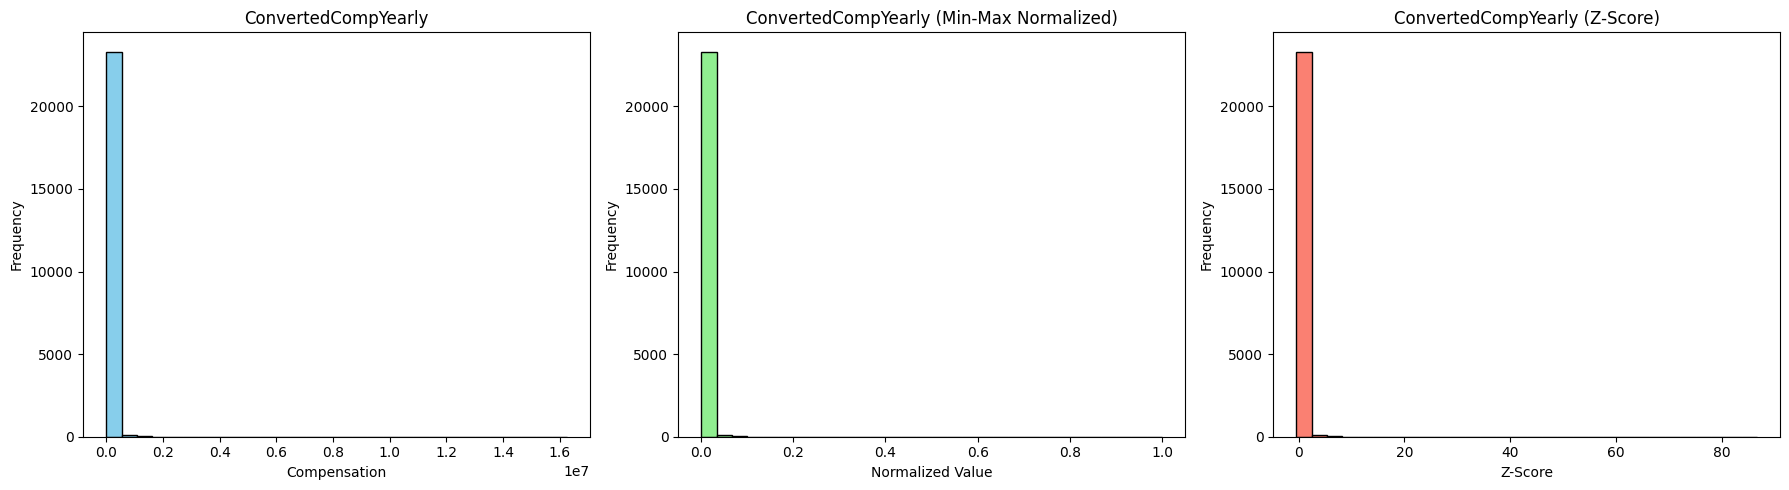

In [16]:
import matplotlib.pyplot as plt

# Set up figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for original values
axes[0].hist(df['ConvertedCompYearly'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('ConvertedCompYearly')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')

# Histogram for Min-Max normalized values
axes[1].hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('ConvertedCompYearly (Min-Max Normalized)')
axes[1].set_xlabel('Normalized Value')
axes[1].set_ylabel('Frequency')

# Histogram for Z-score standardized values
axes[2].hist(df['ConvertedCompYearly_ZScore'].dropna(), bins=30, color='salmon', edgecolor='black')
axes[2].set_title('ConvertedCompYearly (Z-Score)')
axes[2].set_xlabel('Z-Score')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


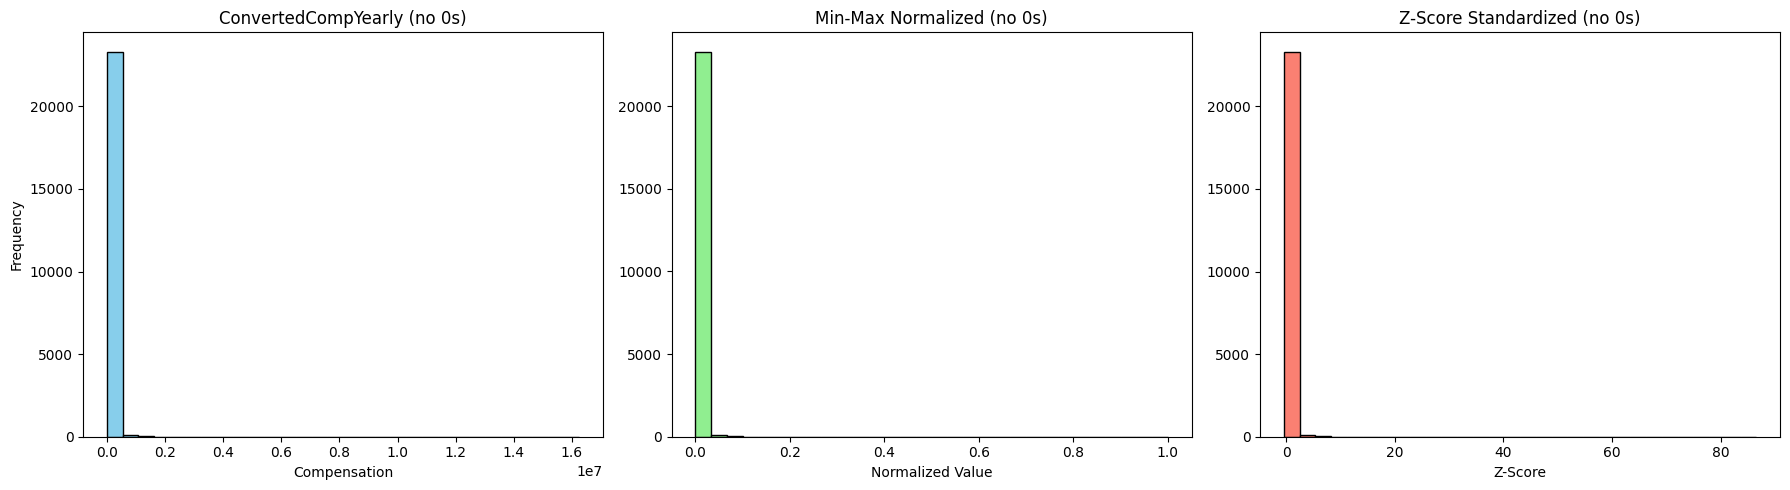

In [17]:
import matplotlib.pyplot as plt

# Filter out zero values and NaNs
original = df['ConvertedCompYearly']
minmax = df['ConvertedCompYearly_MinMax']
zscore = df['ConvertedCompYearly_ZScore']

original_filtered = original[(original != 0) & (original.notna())]
minmax_filtered = minmax[(minmax != 0) & (minmax.notna())]
zscore_filtered = zscore[(zscore != 0) & (zscore.notna())]

# Create histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(original_filtered, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('ConvertedCompYearly (no 0s)')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')

axes[1].hist(minmax_filtered, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Min-Max Normalized (no 0s)')
axes[1].set_xlabel('Normalized Value')

axes[2].hist(zscore_filtered, bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Z-Score Standardized (no 0s)')
axes[2].set_xlabel('Z-Score')

plt.tight_layout()
plt.show()


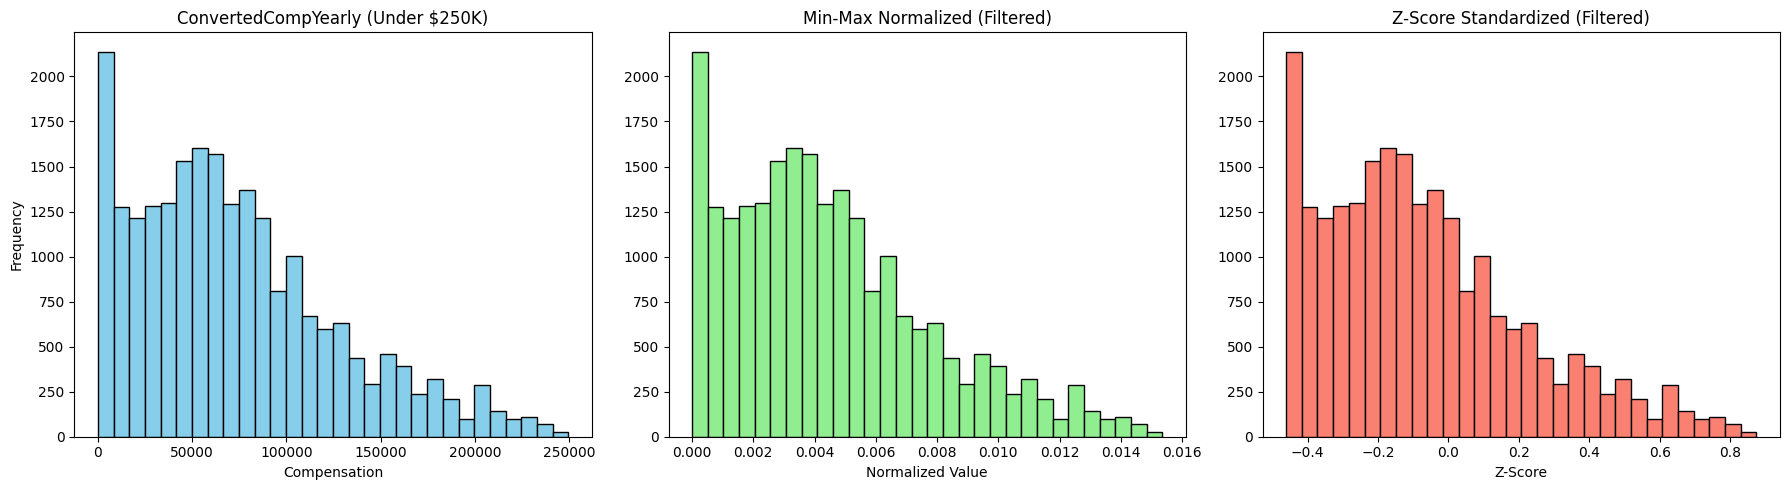

In [18]:
import matplotlib.pyplot as plt

# Define mask to filter by original values
mask = (df['ConvertedCompYearly'] > 0) & (df['ConvertedCompYearly'] < 250000)

# Apply mask
filtered_comp = df.loc[mask, 'ConvertedCompYearly']
filtered_minmax = df.loc[mask, 'ConvertedCompYearly_MinMax']
filtered_zscore = df.loc[mask, 'ConvertedCompYearly_ZScore']

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(filtered_comp, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('ConvertedCompYearly (Under $250K)')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')

axes[1].hist(filtered_minmax, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Min-Max Normalized (Filtered)')
axes[1].set_xlabel('Normalized Value')

axes[2].hist(filtered_zscore, bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Z-Score Standardized (Filtered)')
axes[2].set_xlabel('Z-Score')

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
